In [1]:
from problem import get_train_data, get_test_data, WeightedClassificationError
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf
from time import time
import pandas as pd
import math
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
videos_train, labels_train = get_train_data()

In [3]:
X_for_classifier= np.array(videos_train)
y_for_classifier= labels_train

In [4]:
videos_test, labels_test  = get_test_data()

In [5]:
Xtest_for_classifier = np.array(videos_test)
ytest_for_classifier = labels_test

In [6]:
from PIL import Image

def resize_frames(video):
    res=[]
    for frame in video:
        resized_img=Image.fromarray(frame).resize((224,224))
        res.append(np.array(resized_img))
    return np.array(res)

In [7]:
#function that gets all dataset
# 30 frames per video for 177 video = 2.65 gb !if considering each frame of float64
# as uint8 it takes 0.33 gb

def gen_videos(videolist):
    newvideos=[] # 177*30*250*250
    for video in videolist:
        reducedvideo= video.read_samples(video.frame_times[0:299:10])
        #CROP from 250 to 224
        reducedvideo=resize_frames(reducedvideo)    

        newvideos.append(reducedvideo)
    return newvideos

In [8]:
X_for_classifier= np.array(gen_videos(X_for_classifier))
X_for_classifier = np.repeat(X_for_classifier[...,np.newaxis], 3, -1)

X_for_classifier.shape

(177, 30, 224, 224, 3)

In [9]:
Xtest_for_classifier= np.array(gen_videos(Xtest_for_classifier))
Xtest_for_classifier = np.repeat(Xtest_for_classifier[...,np.newaxis], 3, -1)

Xtest_for_classifier.shape

(100, 30, 224, 224, 3)

In [10]:
def class_to_int(argument):
    switcher = {
        'A':0,
        'B':1,
        'C':2,
        'D':3,
        'E':4,
        'F':5,
        'G':6,
        'H':7,
    }
 
    # get() method of dictionary data type returns
    # value of passed argument if it is present
    # in dictionary otherwise second argument will
    # be assigned as default value of passed argument
    return switcher.get(argument, "nothing")

def int_to_class(argument):
    switcher = {
        0:'A',
        1:'B',
        2:'C',
        3:'D',
        4:'E',
        5:'F',
        6:'G',
        7:'H',
    }
 
    # get() method of dictionary data type returns
    # value of passed argument if it is present
    # in dictionary otherwise second argument will
    # be assigned as default value of passed argument
    return switcher.get(argument, "nothing")


func=np.vectorize(class_to_int)
#Train
train_labels=func(y_for_classifier)
#Test
test_labels=func(ytest_for_classifier)

In [11]:
for i in (set(train_labels)):
    print(f"{int_to_class(i)} {list(train_labels).count(i)}")

A 18
B 22
C 18
D 10
E 11
F 32
G 22
H 44


In [12]:
for i in (set(test_labels)):
    print(f"{int_to_class(i)} {list(test_labels).count(i)}")

A 10
B 8
C 12
D 11
E 19
F 7
G 16
H 17


In [164]:
def plot_frames(num_rows, num_columns, width, height, data, index):
    
    data = np.reshape(data, (num_rows, num_columns, width, height))
    
    rows_data, columns_data = data.shape[0], data.shape[1]
    
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]

    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    # ---------- modify
    pf=predict_frames_of(Xtest_for_classifier[index,:,:,:])

    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
            axarr[i, j].set_title(pf[i*10+j])
    plt.subplots_adjust(wspace=0.3, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

In [147]:
def plot_frames_1(num_rows, num_columns, width, height, data):
    
    data = np.reshape(data, (num_rows, num_columns, width, height))
    
    rows_data, columns_data = data.shape[0], data.shape[1]
    
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]

    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    # ---------- modify
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

In [148]:
testvid= Xtest_for_classifier[0]
print(testvid.shape)
testvid=np.delete(testvid,[0,1],3) # deletes 2 dim from 3 column
print(testvid.shape)
testvid=np.squeeze(testvid) #squeezes last dim when =1
print(testvid.shape)
np.asarray(testvid).shape


(30, 224, 224, 3)
(30, 224, 224, 1)
(30, 224, 224)


(30, 224, 224)

In [149]:
testvid.shape

(30, 224, 224)

PREDICTION|PROBABILITY ||WEC MODEL


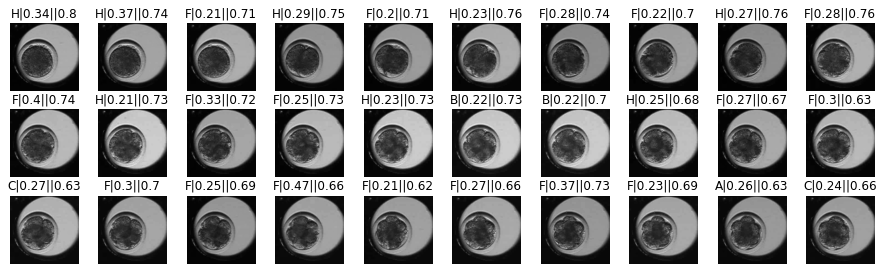

Ground Truth= A


In [165]:
idx=0
plot_frames(3, 10, 224, 224, testvid, idx)
print(f"Ground Truth= {int_to_class(test_labels[idx])}")

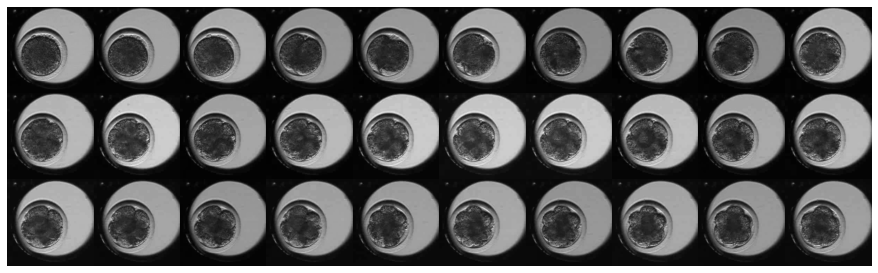

Ground Truth= A


In [130]:
idx=0
plot_frames_1(3, 10, 224, 224, testvid)
print(f"Ground Truth= {int_to_class(test_labels[idx])}")

## K Models

### Defining K models and K datasets of the Kth image

In [17]:
K=30

In [19]:
m1= build_model()
#model.fit(X_for_classifier,y_for_classifier, epochs=100)

In [20]:
Kmodels=[]
# build 30 models
for i in range(K):
    Kmodels.append(build_model())

In [21]:
len(Kmodels)

30

In [22]:
X_for_classifier.shape

(177, 30, 224, 224, 3)

In [39]:
#gen 30 sub datasets with frames 
def gen_datasets(ds):
    datasets=[]
    for i in range(K):
        dataset=[]
        for j in range (ds.shape[0]):
            dataset.append(ds[j,i,:,:])
        datasets.append(dataset)
    return datasets


In [24]:
Kdatasets= gen_datasets()

In [25]:
Kdatasets= np.array(Kdatasets)

In [26]:
np.array(Kdatasets).shape

(30, 177, 224, 224, 3)

In [27]:
for i in range(K):
    Kmodels[i].fit(Kdatasets[i],train_labels,epochs=100)

Epoch 1/100
6/6 [==============================] - 11s 71ms/step - loss: 2.8906 - sparse_categorical_accuracy: 0.1186
Epoch 2/100
6/6 [==============================] - 0s 31ms/step - loss: 2.6284 - sparse_categorical_accuracy: 0.1073
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 2.4430 - sparse_categorical_accuracy: 0.1186
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 2.3749 - sparse_categorical_accuracy: 0.1243
Epoch 5/100
6/6 [==============================] - 0s 25ms/step - loss: 2.2427 - sparse_categorical_accuracy: 0.1582
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 2.1918 - sparse_categorical_accuracy: 0.1412
Epoch 7/100
6/6 [==============================] - 0s 25ms/step - loss: 2.1294 - sparse_categorical_accuracy: 0.1977
Epoch 8/100
6/6 [==============================] - 0s 30ms/step - loss: 2.1048 - sparse_categorical_accuracy: 0.1356
Epoch 9/100
6/6 [==============================] - 0s 26ms/step

6/6 [==============================] - 0s 26ms/step - loss: 1.8168 - sparse_categorical_accuracy: 0.2994
Epoch 40/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8723 - sparse_categorical_accuracy: 0.2938
Epoch 41/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8303 - sparse_categorical_accuracy: 0.3051
Epoch 42/100
6/6 [==============================] - 0s 25ms/step - loss: 1.8070 - sparse_categorical_accuracy: 0.2712
Epoch 43/100
6/6 [==============================] - 0s 25ms/step - loss: 1.8783 - sparse_categorical_accuracy: 0.2881
Epoch 44/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7608 - sparse_categorical_accuracy: 0.2938
Epoch 45/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7970 - sparse_categorical_accuracy: 0.3277
Epoch 46/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7982 - sparse_categorical_accuracy: 0.3220
Epoch 47/100
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 35ms/step - loss: 1.6571 - sparse_categorical_accuracy: 0.3107
Epoch 78/100
6/6 [==============================] - 0s 30ms/step - loss: 1.6760 - sparse_categorical_accuracy: 0.4068
Epoch 79/100
6/6 [==============================] - 0s 27ms/step - loss: 1.7329 - sparse_categorical_accuracy: 0.3220
Epoch 80/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6426 - sparse_categorical_accuracy: 0.3616
Epoch 81/100
6/6 [==============================] - 0s 30ms/step - loss: 1.6161 - sparse_categorical_accuracy: 0.4124
Epoch 82/100
6/6 [==============================] - 0s 32ms/step - loss: 1.5901 - sparse_categorical_accuracy: 0.4068
Epoch 83/100
6/6 [==============================] - 0s 27ms/step - loss: 1.6139 - sparse_categorical_accuracy: 0.4407
Epoch 84/100
6/6 [==============================] - 0s 27ms/step - loss: 1.5460 - sparse_categorical_accuracy: 0.4633
Epoch 85/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 26ms/step - loss: 1.9968 - sparse_categorical_accuracy: 0.2712
Epoch 16/100
6/6 [==============================] - 0s 28ms/step - loss: 1.9782 - sparse_categorical_accuracy: 0.2655
Epoch 17/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9792 - sparse_categorical_accuracy: 0.2260
Epoch 18/100
6/6 [==============================] - 0s 27ms/step - loss: 2.0189 - sparse_categorical_accuracy: 0.2373
Epoch 19/100
6/6 [==============================] - 0s 30ms/step - loss: 1.9985 - sparse_categorical_accuracy: 0.2542
Epoch 20/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9780 - sparse_categorical_accuracy: 0.2768
Epoch 21/100
6/6 [==============================] - 0s 29ms/step - loss: 1.9829 - sparse_categorical_accuracy: 0.2429
Epoch 22/100
6/6 [==============================] - 0s 25ms/step - loss: 1.9922 - sparse_categorical_accuracy: 0.2486
Epoch 23/100
6/6 [==============================] - 0s 27ms/step - lo

6/6 [==============================] - 0s 29ms/step - loss: 1.7454 - sparse_categorical_accuracy: 0.3333
Epoch 54/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8097 - sparse_categorical_accuracy: 0.3559
Epoch 55/100
6/6 [==============================] - 0s 30ms/step - loss: 1.7227 - sparse_categorical_accuracy: 0.3390
Epoch 56/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7535 - sparse_categorical_accuracy: 0.3672
Epoch 57/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7043 - sparse_categorical_accuracy: 0.3446
Epoch 58/100
6/6 [==============================] - 0s 29ms/step - loss: 1.7163 - sparse_categorical_accuracy: 0.3390
Epoch 59/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7442 - sparse_categorical_accuracy: 0.3616
Epoch 60/100
6/6 [==============================] - 0s 31ms/step - loss: 1.7443 - sparse_categorical_accuracy: 0.3729
Epoch 61/100
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 27ms/step - loss: 1.5277 - sparse_categorical_accuracy: 0.4237
Epoch 92/100
6/6 [==============================] - 0s 26ms/step - loss: 1.4544 - sparse_categorical_accuracy: 0.4915
Epoch 93/100
6/6 [==============================] - 0s 26ms/step - loss: 1.4976 - sparse_categorical_accuracy: 0.5254
Epoch 94/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5113 - sparse_categorical_accuracy: 0.4463
Epoch 95/100
6/6 [==============================] - 0s 27ms/step - loss: 1.5172 - sparse_categorical_accuracy: 0.4124
Epoch 96/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5229 - sparse_categorical_accuracy: 0.4463
Epoch 97/100
6/6 [==============================] - 0s 26ms/step - loss: 1.5270 - sparse_categorical_accuracy: 0.4463
Epoch 98/100
6/6 [==============================] - 0s 26ms/step - loss: 1.4895 - sparse_categorical_accuracy: 0.4633
Epoch 99/100
6/6 [==============================] - 0s 23ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.9051 - sparse_categorical_accuracy: 0.2825
Epoch 30/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9500 - sparse_categorical_accuracy: 0.2147
Epoch 31/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8644 - sparse_categorical_accuracy: 0.3164
Epoch 32/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8745 - sparse_categorical_accuracy: 0.2768
Epoch 33/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8409 - sparse_categorical_accuracy: 0.3559
Epoch 34/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8553 - sparse_categorical_accuracy: 0.2938
Epoch 35/100
6/6 [==============================] - 0s 27ms/step - loss: 1.8748 - sparse_categorical_accuracy: 0.2938
Epoch 36/100
6/6 [==============================] - 0s 27ms/step - loss: 1.8201 - sparse_categorical_accuracy: 0.3333
Epoch 37/100
6/6 [==============================] - 0s 30ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.5926 - sparse_categorical_accuracy: 0.4181
Epoch 68/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6449 - sparse_categorical_accuracy: 0.4407
Epoch 69/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5822 - sparse_categorical_accuracy: 0.4181
Epoch 70/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5851 - sparse_categorical_accuracy: 0.4237
Epoch 71/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6100 - sparse_categorical_accuracy: 0.3842
Epoch 72/100
6/6 [==============================] - 0s 26ms/step - loss: 1.5948 - sparse_categorical_accuracy: 0.4124
Epoch 73/100
6/6 [==============================] - 0s 32ms/step - loss: 1.6642 - sparse_categorical_accuracy: 0.3616
Epoch 74/100
6/6 [==============================] - 0s 29ms/step - loss: 1.5973 - sparse_categorical_accuracy: 0.4068
Epoch 75/100
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 26ms/step - loss: 2.1718 - sparse_categorical_accuracy: 0.1525
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 2.0724 - sparse_categorical_accuracy: 0.2203
Epoch 7/100
6/6 [==============================] - 0s 25ms/step - loss: 2.1456 - sparse_categorical_accuracy: 0.1808
Epoch 8/100
6/6 [==============================] - 0s 25ms/step - loss: 2.0718 - sparse_categorical_accuracy: 0.1864
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 2.0952 - sparse_categorical_accuracy: 0.1921
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 2.0389 - sparse_categorical_accuracy: 0.2090
Epoch 11/100
6/6 [==============================] - 0s 25ms/step - loss: 2.0805 - sparse_categorical_accuracy: 0.2034
Epoch 12/100
6/6 [==============================] - 0s 25ms/step - loss: 2.1283 - sparse_categorical_accuracy: 0.1299
Epoch 13/100
6/6 [==============================] - 0s 25ms/step - loss: 

6/6 [==============================] - 0s 26ms/step - loss: 1.6721 - sparse_categorical_accuracy: 0.4350
Epoch 44/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7895 - sparse_categorical_accuracy: 0.3390
Epoch 45/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7896 - sparse_categorical_accuracy: 0.3164
Epoch 46/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6886 - sparse_categorical_accuracy: 0.3842
Epoch 47/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7506 - sparse_categorical_accuracy: 0.3390
Epoch 48/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6931 - sparse_categorical_accuracy: 0.4237
Epoch 49/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6875 - sparse_categorical_accuracy: 0.4068
Epoch 50/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6823 - sparse_categorical_accuracy: 0.3955
Epoch 51/100
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.5190 - sparse_categorical_accuracy: 0.4520
Epoch 82/100
6/6 [==============================] - 0s 26ms/step - loss: 1.5554 - sparse_categorical_accuracy: 0.4463
Epoch 83/100
6/6 [==============================] - 0s 25ms/step - loss: 1.4934 - sparse_categorical_accuracy: 0.4689
Epoch 84/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5031 - sparse_categorical_accuracy: 0.4689
Epoch 85/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5103 - sparse_categorical_accuracy: 0.4689
Epoch 86/100
6/6 [==============================] - 0s 30ms/step - loss: 1.5004 - sparse_categorical_accuracy: 0.4633
Epoch 87/100
6/6 [==============================] - 0s 31ms/step - loss: 1.5093 - sparse_categorical_accuracy: 0.4407
Epoch 88/100
6/6 [==============================] - 0s 28ms/step - loss: 1.4739 - sparse_categorical_accuracy: 0.4576
Epoch 89/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 26ms/step - loss: 2.0870 - sparse_categorical_accuracy: 0.2147
Epoch 20/100
6/6 [==============================] - 0s 31ms/step - loss: 2.0297 - sparse_categorical_accuracy: 0.2373
Epoch 21/100
6/6 [==============================] - 0s 26ms/step - loss: 2.0088 - sparse_categorical_accuracy: 0.2655
Epoch 22/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9783 - sparse_categorical_accuracy: 0.2881
Epoch 23/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9062 - sparse_categorical_accuracy: 0.3446
Epoch 24/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9257 - sparse_categorical_accuracy: 0.2712
Epoch 25/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9287 - sparse_categorical_accuracy: 0.2994
Epoch 26/100
6/6 [==============================] - 0s 25ms/step - loss: 1.9722 - sparse_categorical_accuracy: 0.2655
Epoch 27/100
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.6583 - sparse_categorical_accuracy: 0.3955
Epoch 58/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5950 - sparse_categorical_accuracy: 0.4124
Epoch 59/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6141 - sparse_categorical_accuracy: 0.4520
Epoch 60/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6868 - sparse_categorical_accuracy: 0.3559
Epoch 61/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6226 - sparse_categorical_accuracy: 0.4124
Epoch 62/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6407 - sparse_categorical_accuracy: 0.3898
Epoch 63/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5714 - sparse_categorical_accuracy: 0.4124
Epoch 64/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6060 - sparse_categorical_accuracy: 0.4181
Epoch 65/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.3894 - sparse_categorical_accuracy: 0.5028
Epoch 96/100
6/6 [==============================] - 0s 30ms/step - loss: 1.3929 - sparse_categorical_accuracy: 0.5198
Epoch 97/100
6/6 [==============================] - 0s 31ms/step - loss: 1.4159 - sparse_categorical_accuracy: 0.5480
Epoch 98/100
6/6 [==============================] - 0s 31ms/step - loss: 1.3953 - sparse_categorical_accuracy: 0.5141
Epoch 99/100
6/6 [==============================] - 0s 24ms/step - loss: 1.3935 - sparse_categorical_accuracy: 0.5028
Epoch 100/100
6/6 [==============================] - 0s 25ms/step - loss: 1.4018 - sparse_categorical_accuracy: 0.5141
Epoch 1/100
6/6 [==============================] - 1s 25ms/step - loss: 2.4787 - sparse_categorical_accuracy: 0.0847
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 2.3588 - sparse_categorical_accuracy: 0.1243
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss

6/6 [==============================] - 0s 25ms/step - loss: 1.8399 - sparse_categorical_accuracy: 0.2938
Epoch 34/100
6/6 [==============================] - 0s 25ms/step - loss: 1.8022 - sparse_categorical_accuracy: 0.3559
Epoch 35/100
6/6 [==============================] - 0s 24ms/step - loss: 1.8816 - sparse_categorical_accuracy: 0.2881
Epoch 36/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7354 - sparse_categorical_accuracy: 0.3616
Epoch 37/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6765 - sparse_categorical_accuracy: 0.3616
Epoch 38/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7869 - sparse_categorical_accuracy: 0.2994
Epoch 39/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7870 - sparse_categorical_accuracy: 0.3390
Epoch 40/100
6/6 [==============================] - 0s 25ms/step - loss: 1.7770 - sparse_categorical_accuracy: 0.3164
Epoch 41/100
6/6 [==============================] - 0s 25ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.5318 - sparse_categorical_accuracy: 0.4124
Epoch 72/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5219 - sparse_categorical_accuracy: 0.4350
Epoch 73/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5089 - sparse_categorical_accuracy: 0.4407
Epoch 74/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5507 - sparse_categorical_accuracy: 0.4294
Epoch 75/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5463 - sparse_categorical_accuracy: 0.4350
Epoch 76/100
6/6 [==============================] - 0s 25ms/step - loss: 1.4851 - sparse_categorical_accuracy: 0.4576
Epoch 77/100
6/6 [==============================] - 0s 26ms/step - loss: 1.5392 - sparse_categorical_accuracy: 0.4181
Epoch 78/100
6/6 [==============================] - 0s 29ms/step - loss: 1.4931 - sparse_categorical_accuracy: 0.4350
Epoch 79/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 26ms/step - loss: 2.0642 - sparse_categorical_accuracy: 0.2034
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 2.0825 - sparse_categorical_accuracy: 0.2373
Epoch 11/100
6/6 [==============================] - 0s 26ms/step - loss: 2.0107 - sparse_categorical_accuracy: 0.2938
Epoch 12/100
6/6 [==============================] - 0s 26ms/step - loss: 2.0355 - sparse_categorical_accuracy: 0.2147
Epoch 13/100
6/6 [==============================] - 0s 26ms/step - loss: 2.0067 - sparse_categorical_accuracy: 0.2542
Epoch 14/100
6/6 [==============================] - 0s 26ms/step - loss: 2.0494 - sparse_categorical_accuracy: 0.2542
Epoch 15/100
6/6 [==============================] - 0s 25ms/step - loss: 1.9964 - sparse_categorical_accuracy: 0.2599
Epoch 16/100
6/6 [==============================] - 0s 31ms/step - loss: 2.0096 - sparse_categorical_accuracy: 0.2712
Epoch 17/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 26ms/step - loss: 1.6894 - sparse_categorical_accuracy: 0.3955
Epoch 48/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6795 - sparse_categorical_accuracy: 0.4124
Epoch 49/100
6/6 [==============================] - 0s 26ms/step - loss: 1.7324 - sparse_categorical_accuracy: 0.3446
Epoch 50/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6888 - sparse_categorical_accuracy: 0.3785
Epoch 51/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6187 - sparse_categorical_accuracy: 0.4124
Epoch 52/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6658 - sparse_categorical_accuracy: 0.3955
Epoch 53/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6945 - sparse_categorical_accuracy: 0.3842
Epoch 54/100
6/6 [==============================] - 0s 26ms/step - loss: 1.6988 - sparse_categorical_accuracy: 0.3672
Epoch 55/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 28ms/step - loss: 1.4063 - sparse_categorical_accuracy: 0.4802
Epoch 86/100
6/6 [==============================] - 0s 28ms/step - loss: 1.4682 - sparse_categorical_accuracy: 0.4520
Epoch 87/100
6/6 [==============================] - 0s 27ms/step - loss: 1.4247 - sparse_categorical_accuracy: 0.5311
Epoch 88/100
6/6 [==============================] - 0s 26ms/step - loss: 1.3673 - sparse_categorical_accuracy: 0.5480
Epoch 89/100
6/6 [==============================] - 0s 31ms/step - loss: 1.4122 - sparse_categorical_accuracy: 0.5141
Epoch 90/100
6/6 [==============================] - 0s 32ms/step - loss: 1.4587 - sparse_categorical_accuracy: 0.4689
Epoch 91/100
6/6 [==============================] - 0s 31ms/step - loss: 1.3984 - sparse_categorical_accuracy: 0.5085
Epoch 92/100
6/6 [==============================] - 0s 27ms/step - loss: 1.3654 - sparse_categorical_accuracy: 0.4972
Epoch 93/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 26ms/step - loss: 1.9097 - sparse_categorical_accuracy: 0.2938
Epoch 24/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9256 - sparse_categorical_accuracy: 0.2994
Epoch 25/100
6/6 [==============================] - 0s 26ms/step - loss: 1.9334 - sparse_categorical_accuracy: 0.2542
Epoch 26/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8443 - sparse_categorical_accuracy: 0.3390
Epoch 27/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8405 - sparse_categorical_accuracy: 0.3277
Epoch 28/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8484 - sparse_categorical_accuracy: 0.3390
Epoch 29/100
6/6 [==============================] - 0s 26ms/step - loss: 1.8792 - sparse_categorical_accuracy: 0.2825
Epoch 30/100
6/6 [==============================] - 0s 27ms/step - loss: 1.8202 - sparse_categorical_accuracy: 0.3390
Epoch 31/100
6/6 [==============================] - 0s 27ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.5761 - sparse_categorical_accuracy: 0.4689
Epoch 62/100
6/6 [==============================] - 0s 26ms/step - loss: 1.5911 - sparse_categorical_accuracy: 0.3842
Epoch 63/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5385 - sparse_categorical_accuracy: 0.4746
Epoch 64/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5676 - sparse_categorical_accuracy: 0.4068
Epoch 65/100
6/6 [==============================] - 0s 25ms/step - loss: 1.6257 - sparse_categorical_accuracy: 0.4237
Epoch 66/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5789 - sparse_categorical_accuracy: 0.4068
Epoch 67/100
6/6 [==============================] - 0s 25ms/step - loss: 1.5531 - sparse_categorical_accuracy: 0.4520
Epoch 68/100
6/6 [==============================] - 0s 26ms/step - loss: 1.5256 - sparse_categorical_accuracy: 0.4576
Epoch 69/100
6/6 [==============================] - 0s 26ms/step - lo

6/6 [==============================] - 0s 25ms/step - loss: 1.2959 - sparse_categorical_accuracy: 0.5819
Epoch 100/100
6/6 [==============================] - 0s 24ms/step - loss: 1.2913 - sparse_categorical_accuracy: 0.5480
Epoch 1/100
6/6 [==============================] - 1s 27ms/step - loss: 2.6253 - sparse_categorical_accuracy: 0.1299
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 2.4776 - sparse_categorical_accuracy: 0.1356
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss: 2.2839 - sparse_categorical_accuracy: 0.1751
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 2.2352 - sparse_categorical_accuracy: 0.1977
Epoch 5/100
6/6 [==============================] - 0s 29ms/step - loss: 2.1820 - sparse_categorical_accuracy: 0.1808
Epoch 6/100
6/6 [==============================] - 0s 25ms/step - loss: 2.1717 - sparse_categorical_accuracy: 0.1921
Epoch 7/100
6/6 [==============================] - 0s 25ms/step - loss: 2.

(-0.5, 223.5, 223.5, -0.5)

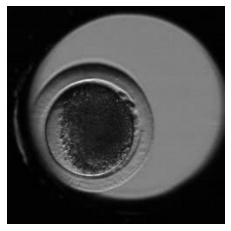

In [28]:
x=X_for_classifier[0,0,:,:].astype('uint8')
plt.imshow(x)
plt.axis('off')

In [29]:
X_for_classifier[0,i,:,:].shape

(224, 224, 3)

In [30]:
x=X_for_classifier[0,0,:,:]
x=x[None, ...]
a=Kmodels[0].predict(x, verbose=0)
a

array([[0.14125326, 0.1753917 , 0.06790569, 0.04533058, 0.04619055,
        0.2010984 , 0.09423973, 0.22859016]], dtype=float32)

In [31]:
b=a.squeeze()
b

array([0.14125326, 0.1753917 , 0.06790569, 0.04533058, 0.04619055,
       0.2010984 , 0.09423973, 0.22859016], dtype=float32)

In [32]:
pred = np.argmax(b, axis=0)
pred

7

In [33]:
s=0
print(f"hello {s} ")

hello 0 


(-0.5, 223.5, 223.5, -0.5)

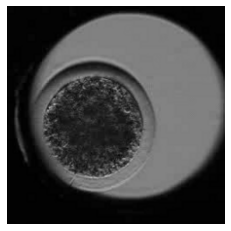

In [34]:
x=X_for_classifier[0,i,:,:].astype('uint8')
plt.imshow(x)
plt.axis('off')


In [35]:
a=X_for_classifier[0,:,:,:]
a=a[0]
a=a[None, ...]
a.shape

(1, 224, 224, 3)

In [161]:
def predict_frames_of(video):
    l=[]
    print("PREDICTION|PROBABILITY ||WEC MODEL")
    for i in range(K):
    
        frame=video[i]
        frame=frame[None, ...]
    
        preds=Kmodels[i].predict(frame, verbose=0)
        preds=preds.squeeze()
        pred= np.argmax(preds, axis=0)
        proba=preds[pred]
        pred=int_to_class(pred)

        s= pred+"|"+ str(round(proba,2))+ "||"+str(round(WCE[i],2))
        l.append(s)
    return l
    

In [162]:
Xtest_for_classifier.shape

(100, 30, 224, 224, 3)

In [163]:
predict_frames_of(Xtest_for_classifier[0,:,:,:])

PREDICTION|PROBABILITY ||WEC MODEL


['H|0.34||0.8',
 'H|0.37||0.74',
 'F|0.21||0.71',
 'H|0.29||0.75',
 'F|0.2||0.71',
 'H|0.23||0.76',
 'F|0.28||0.74',
 'F|0.22||0.7',
 'H|0.27||0.76',
 'F|0.28||0.76',
 'F|0.4||0.74',
 'H|0.21||0.73',
 'F|0.33||0.72',
 'F|0.25||0.73',
 'H|0.23||0.73',
 'B|0.22||0.73',
 'B|0.22||0.7',
 'H|0.25||0.68',
 'F|0.27||0.67',
 'F|0.3||0.63',
 'C|0.27||0.63',
 'F|0.3||0.7',
 'F|0.25||0.69',
 'F|0.47||0.66',
 'F|0.21||0.62',
 'F|0.27||0.66',
 'F|0.37||0.73',
 'F|0.23||0.69',
 'A|0.26||0.63',
 'C|0.24||0.66']

In [ ]:
#taking all predictions for model for frame 29 

mod=Kmodel[29] #model that predicts last image
mod.predict  

In [41]:
Ktest=gen_datasets(Xtest_for_classifier)

In [46]:
np.array(Ktest[0][0]).shape

(224, 224, 3)

In [100]:
np.array(Ktest).shape

(30, 100, 224, 224, 3)

In [110]:
#plot the accuracy for diff models
Kpreds=[]
for i in range(30):

    predictions=[]
    for j in range (100):
        frame=np.array(Ktest[i][j]) #0th frames ds, ith frame in the ds
        preds=Kmodels[i].predict(frame[None, ...],verbose=0)
        preds=preds.squeeze()
        #pred= np.argmax(preds, axis=0)
        #pred= int_to_class(pred)
        predictions.append(preds)
    Kpreds.append(predictions)


In [111]:
np.array(Kpreds).shape

(30, 100, 8)

In [112]:
np.array(Kpreds[0]).shape

(100, 8)

In [113]:
# input order: true, pred
my_pred_time=0 #ignored param
wce = WeightedClassificationError(time_idx=my_pred_time)
wce.compute(y_true=test_labels, y_pred=Kpreds[19])

0.6250000000000001

In [114]:
WCE=[]
wce = WeightedClassificationError(time_idx=my_pred_time)

for i in range(30):
    error=wce.compute(y_true=test_labels, y_pred=Kpreds[i])
    WCE.append(error)

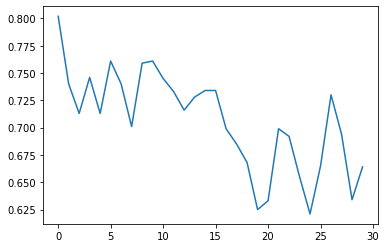

In [117]:
# WCE des K models tested on Kth images of test set
ys = WCE
xs = [x for x in range(len(ys))]

plt.plot(xs, ys)
plt.show()

plt.close()